# import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

# Import the Dataset

In [2]:
haberman=pd.read_csv('haberman.csv')
haberman.columns= ['Age', 'Year operation', 'Axillary nodes detected', 'Survival status']
print (haberman.shape)

(305, 4)


# See all the features

In [3]:
haberman.columns

Index(['Age', 'Year operation', 'Axillary nodes detected', 'Survival status'], dtype='object')

In [4]:
haberman.head()

,Age,Year operation,Axillary nodes detected,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
haberman.describe()

,Age,Year operation,Axillary nodes detected,Survival status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
haberman.tail()

,Age,Year operation,Axillary nodes detected,Survival status
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


1    224
2     81
Name: Survival status, dtype: int64


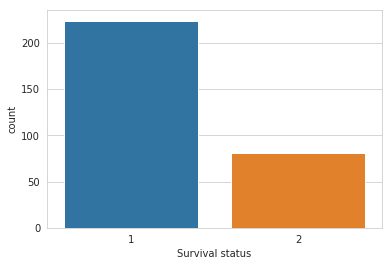

In [7]:
print(haberman['Survival status'].value_counts())
sns.set_style('whitegrid')
sns.countplot(x='Survival status',data=haberman)
plt.show()

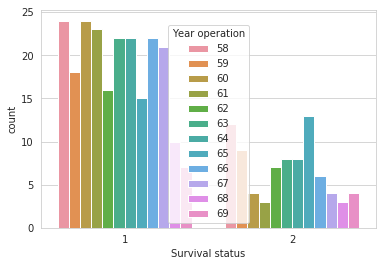

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survival status',hue='Year operation',data=haberman)
plt.show()

# Observations till yet
1. We have 3 features and output is categorical 1 or 2.So basically we can consider it as a classification problems.

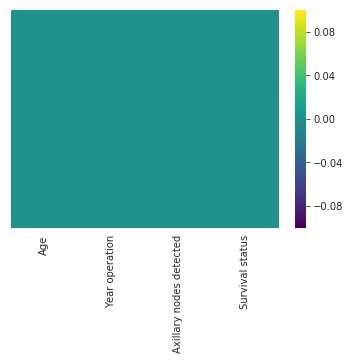

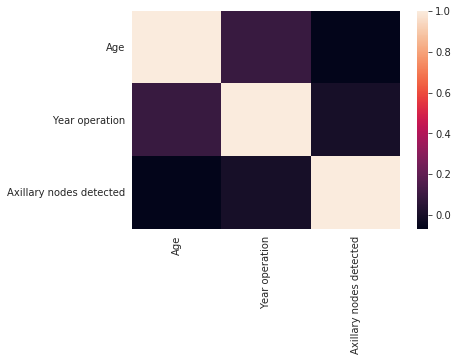

In [13]:
sns.heatmap(haberman.isnull(),yticklabels=False,cmap='viridis',cbar=True)
plt.show()
ds=haberman.values
haberman_hm=haberman.loc[:,'Age':'Axillary nodes detected']
corr=haberman_hm.corr()
sns.heatmap(corr)

There is no value missing in the dataset. 

# Let's start with plotting

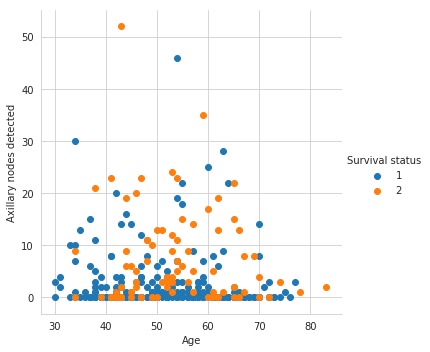

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival status", size=5).map(plt.scatter, "Age", "Axillary nodes detected").add_legend();
plt.show();

# Observations from Above Plot
1. There is only one person having age gretaer than 80 and maximum nodes detected is greater than 50.so lets see their values
2. It is very randomly distributed and we cannot figure out anything from it.

In [15]:
# max age
print(haberman.Age.max())

83


In [16]:
#max nodes detected
print(haberman['Axillary nodes detected'].max())

52


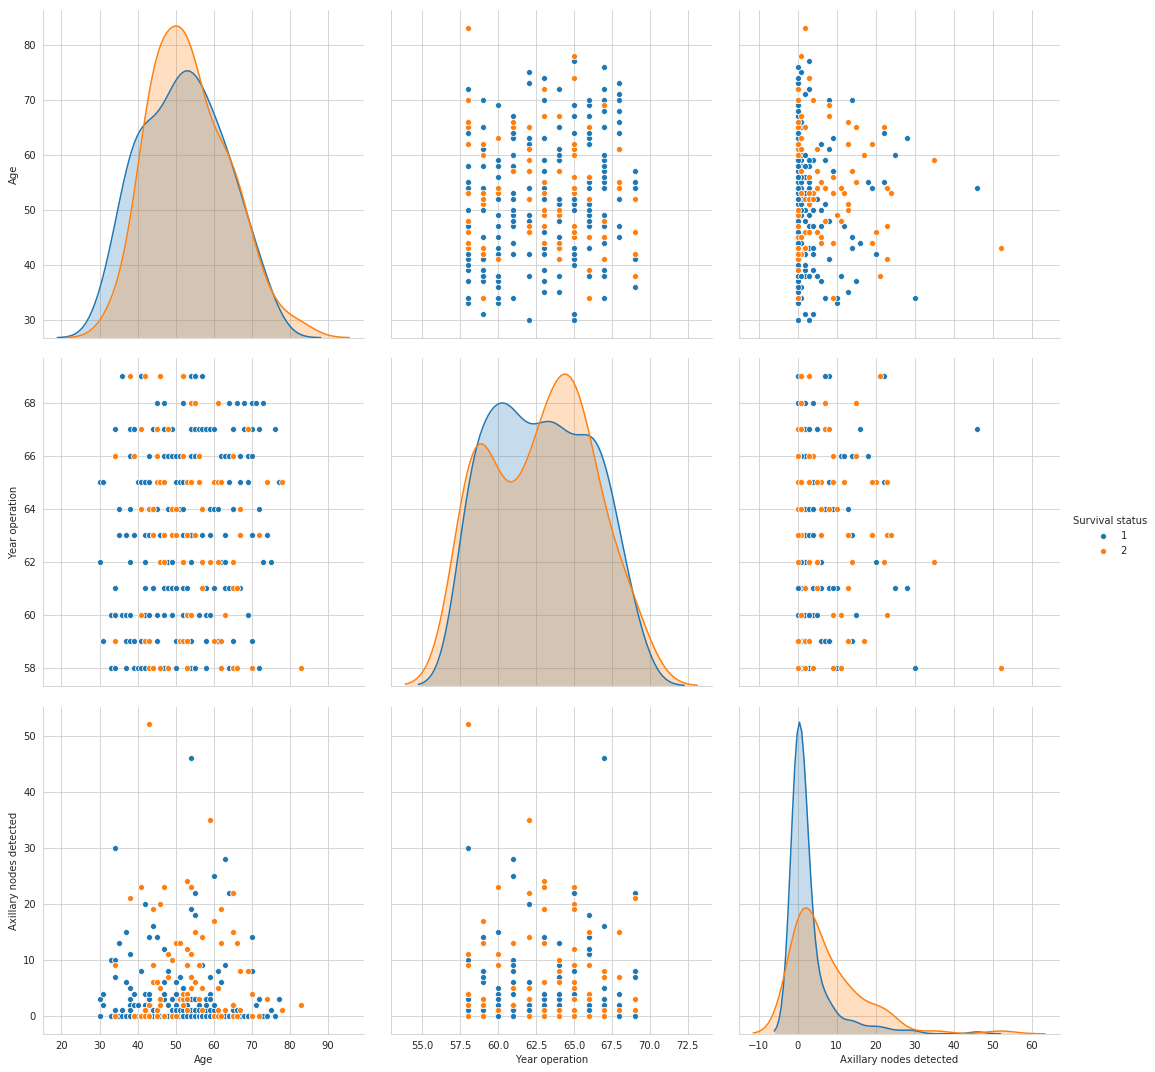

In [17]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman,size=5,hue="Survival status",vars=["Age","Year operation" ,"Axillary nodes detected"])
plt.show()

# Observations from above pair plots
1. The person having less than equal to 38 and axillary nodes detected less than 30 survived more than 5 years mostlt(inference from Nodes vs Age)
2. The year of operation is less than 65 and age is less than 40 the person survived more than 5 years.(inference from Year of Opeartion vs Age)
3. The graph between Year of operation and Nodes could not tell anything specific.
4. So from above points we can tell that if age is less than 38 and nodes detected are less than 30 and year of operation is less than 1965 the person would have survival status 1. most of the times.

# Probablity Density Function
1.The goal of PDF is to find by using which single variable we can seperate our classes.

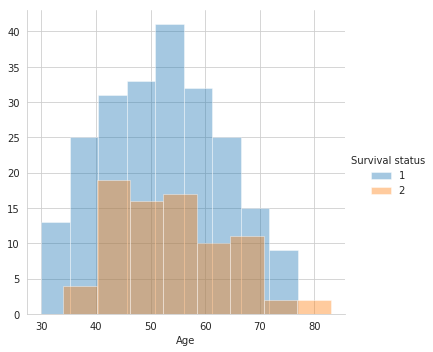

In [18]:
#The first parameter taken here is Age.
survival_status1 = haberman.loc[haberman["Survival status"] == 1];
survival_status2 = haberman.loc[haberman["Survival status"] == 2];
sns.FacetGrid(haberman, hue="Survival status", size=5).map(sns.distplot, "Age",kde=False).add_legend();
plt.show();

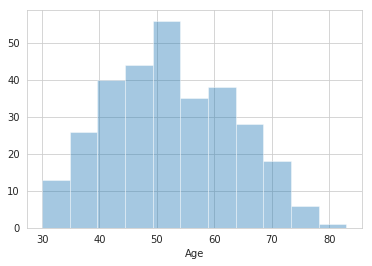

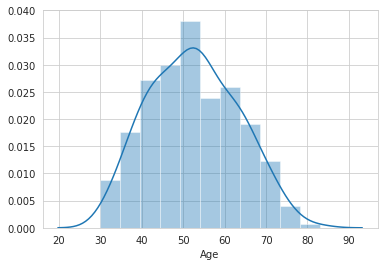

In [19]:
sns.distplot(haberman["Age"],kde=False)
plt.show()
sns.distplot(haberman["Age"],kde=True)
plt.show()

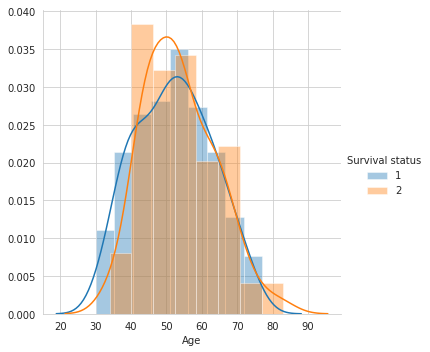

In [20]:
#The first parameter taken here is Age.
survival_status1 = haberman.loc[haberman["Survival status"] == 1];
survival_status2 = haberman.loc[haberman["Survival status"] == 2];
sns.FacetGrid(haberman, hue="Survival status", size=5).map(sns.distplot, "Age").add_legend();
plt.show();

### So above probablity density function w.r.t age tell if age is less than 34 the person had survival status=1 or if the age is greater than equal to 77 person had survival_status=2

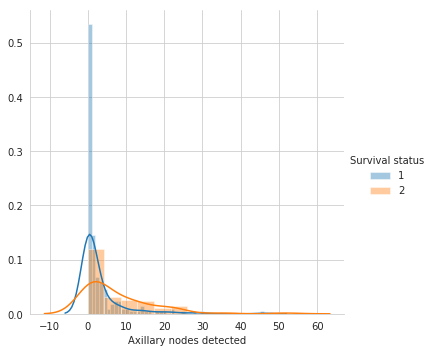

In [21]:
#The third feature is Axillary nodes detected
sns.FacetGrid(haberman,hue="Survival status",size=5).map(sns.distplot, "Axillary nodes detected").add_legend()
plt.show()

### So above pdf tells us that if nodes are greater than 30 most probably the person will die before 5 years but the below staements shows there is mostly equal chance of person dying before 5 years and after years

In [22]:
haberman["Survival status"][haberman["Axillary nodes detected"]>=30].value_counts()

2    2
1    2
Name: Survival status, dtype: int64

In [23]:
haberman["Survival status"][haberman["Axillary nodes detected"]>=40].value_counts()

2    1
1    1
Name: Survival status, dtype: int64

In [ ]:
# So Above pdfs only give us age as single feature on the basis of which we can predict few outcomes.

# Box Plots

Median Age 52.0


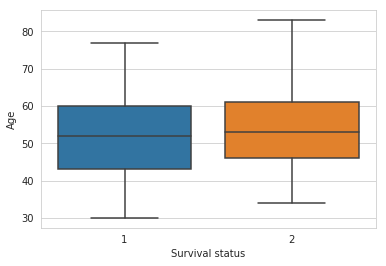

In [24]:
sns.boxplot(x='Survival status',y='Age', data=haberman)
print("Median Age",haberman["Age"].median())
plt.show()

Axillary Nodes Detected Median 0.0
Axillary Nodes Detected Median 4.0


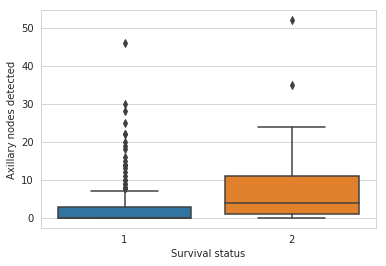

In [25]:
sns.boxplot(x='Survival status',y='Axillary nodes detected', data=haberman)
print("Axillary Nodes Detected Median",haberman["Axillary nodes detected"][haberman['Survival status']==1].median())
print("Axillary Nodes Detected Median",haberman["Axillary nodes detected"][haberman['Survival status']==2].median())
plt.show()

## The above box plot only tells persons having age less than 33 have Survival status 1. The person having age greater than 77 had survival status 2.The central line tells me the median value or 50th percentile, line below it tells me 25th percentile and line above it tells me 75th percentile.
### We can get the same result from cdf's also.

# Multivariate Analysis

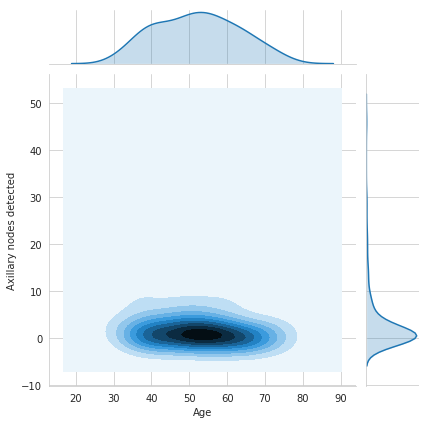

In [26]:

sns.jointplot(x="Age", y="Axillary nodes detected", data=survival_status1, kind="kde");
plt.show();

# The above plot shows the maximum person who had survival status 1 were of age 45 to 65 and they had 2 nodes max which could also be seen from the pair plots plotted above.

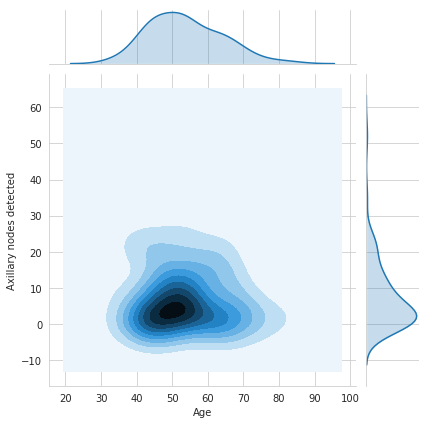

In [27]:
sns.jointplot(x="Age", y="Axillary nodes detected", data=survival_status2, kind="kde");

## The person having survival status 2 of age 43 to 53 had 0-8 nodes.

# CDF(Comulative Distributed Function)

[0.01044833 0.02279635 0.02659574 0.01994681 0.03514438 0.03514438
 0.01994681 0.0237462  0.01329787 0.00569909]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.18148292 0.01746894 0.00485248 0.00582298 0.00388199 0.0009705
 0.00194099 0.         0.         0.0009705 ]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.17045455 0.0974026  0.09334416 0.06493506 0.08928571 0.08928571
 0.06087662 0.08928571 0.08522727 0.06899351]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


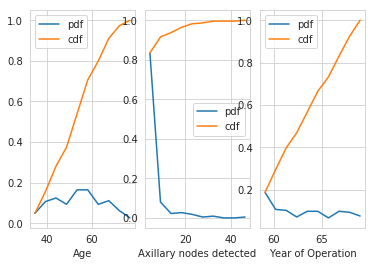

In [28]:

counts,bin_edges=np.histogram(survival_status1["Age"],bins=10,density="true")
pdf=counts/sum(counts)

plt.figure(1)
plt.subplot(1,3,1)
cdf=np.cumsum(pdf)
print(counts)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel("Age")
plt.legend()
plt.subplots_adjust(wspace=0.1)

nodes_counts,nodes_bin_edges=np.histogram(survival_status1["Axillary nodes detected"],bins=10,density="true")
pdf_nodes=nodes_counts/sum(nodes_counts)
plt.figure(1)
plt.subplot(1,3,2)
cdf_nodes=np.cumsum(pdf_nodes)
print(nodes_counts)
print(nodes_bin_edges)
plt.plot(nodes_bin_edges[1:],pdf_nodes,label='pdf')
plt.plot(nodes_bin_edges[1:],cdf_nodes,label='cdf')
plt.xlabel("Axillary nodes detected")
plt.legend()
plt.subplots_adjust(wspace=0.1)

yop_counts,yop_bin_edges=np.histogram(survival_status1["Year operation"],bins=10,density="true")
pdf_yop=yop_counts/sum(yop_counts)
plt.figure(1)
plt.subplot(1,3,3)
cdf_yop=np.cumsum(pdf_yop)
print(yop_counts)
print(yop_bin_edges)
plt.plot(yop_bin_edges[1:],pdf_yop,label='pdf')
plt.plot(yop_bin_edges[1:],cdf_yop,label='cdf')
plt.xlabel("Year of Operation")
plt.legend()
plt.subplots_adjust(wspace=0.1)

plt.show()

#print(survival_status1.shape)
#print(survival_status1["Axillary nodes detected"][survival_status1["Axillary nodes detected"]<20].count)

## So the above cdfs tell us approx 96% people who had survival_status1 had nodes less than 20 and in total 75 % people who had survival_status1 had a age less than equal to 60.

In [ ]:
counts,bin_edges=np.histogram(survival_status2["Age"],bins=10,density="true")
pdf=counts/sum(counts)

plt.figure(1)
plt.subplot(1,3,1)
cdf=np.cumsum(pdf)
print(counts)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel("Age")
plt.legend()
plt.subplots_adjust(wspace=0.1)

nodes_counts,nodes_bin_edges=np.histogram(survival_status2["Axillary nodes detected"],bins=10,density="true")
pdf_nodes=nodes_counts/sum(nodes_counts)
plt.figure(1)
plt.subplot(1,3,2)
cdf_nodes=np.cumsum(pdf_nodes)
print(nodes_counts)
print(nodes_bin_edges)
plt.plot(nodes_bin_edges[1:],pdf_nodes,label='pdf')
plt.plot(nodes_bin_edges[1:],cdf_nodes,label='cdf')
plt.xlabel("Axillary nodes detected")
plt.legend()
plt.subplots_adjust(wspace=0.1)

yop_counts,yop_bin_edges=np.histogram(survival_status2["Year operation"],bins=10,density="true")
pdf_yop=yop_counts/sum(yop_counts)
plt.figure(1)
plt.subplot(1,3,3)
cdf_yop=np.cumsum(pdf_yop)
print(yop_counts)
print(yop_bin_edges)
plt.plot(yop_bin_edges[1:],pdf_yop,label='pdf')
plt.plot(yop_bin_edges[1:],cdf_yop,label='cdf')
plt.xlabel("Year of Operation")
plt.legend()
plt.subplots_adjust(wspace=0.1)


plt.show()

## Above cdf and pdf tells us the persons who had survival_status2 the minimum age of that person is 38yrs. Around 82% people who had survival_status2 had nodes less than 20. The year of operation cannot be any major factor in determining whether the person had survival_status1 or survival_status2

# Overall Analysis
1. The maximum nodes detected are greater than 50 and the maximum age of the person is 83 and he had survival_status2.
2. So from above points we can tell that if age is less than 38 and nodes detected are less than 30 and year of     operation is less than 1965 the person would have most probably survival status 1 most of the times or if the age is grater than 77 the person would have survival_status2.
3. So if number of nodes are less than 20 then age will play a vital role in predicting the survival_status.
4. Around 96% people who had survival_status1 had nodes less than 20.
5. The Most of the person who had survival status 1 between the ages 50-65 had max 2 nodes.
6. There are total 305 records in dataset and it is partially balanced dataset as the number of perosns having survival status 1 is 225 and those having survival status 2 is 81.